# Proyek Analisis Data: Bike Share Dataset
- Nama: Norman Dwi Febrio
- Email: mumpungaji54@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda selama rentang waktu tersebut?
- Pada saat hari apa yang memiliki banyak penyewaan sepeda?
- Pada tanggal berapa penyewaan sepeda paling rendah? Apa penyebabnya?
- Pada tanggal berapa penyewaan sepeda paling tinggi? Apa penyebabnya?
- Bagaimana korelasi antara musim, hari kerja, hari libur, cuaca, kelembaban, temperatur, dan kecepatan angin terhadap banyaknya penyewaan sepeda?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
bike_share_df = pd.read_csv("day.csv")
bike_share_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

#### Periksa data type tiap kolom dan temukan apakah terdapat null values pada dataset.

In [3]:
bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari info di atas, terdapat kesalahan data type pada kolom "dteday". Kolom ini seharusnya memiliki data type datetime64[ns]. Pada info ini juga dapat disimpulkan bahwa dataset ini tidak memiliki null values.

#### Periksa apakah dataset ini meiliki data duplikat

In [4]:
bike_share_df.duplicated().sum()

0

dari hasil di atas, dapat kita ketahui bahwa dataset ini tidak memiliki data duplikat.

#### Periksa apakah dataset ini memiliki nilai yang tidak wajar atau anomali

In [5]:
bike_share_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Terlihat tidak ada nilai yang tidak wajar atau anomali yang mungkin saja disebabkan oleh human error.

#### Kesimpulan setelah melakukan assessing data

Dataset ini sudah memiliki data yang cukup bersih, hanya saja terdapat ketidak tepatan data type pada salah satu kolom, yaitu kolom "dteday" yang seharusnya bertipe data datetime64[ns].

### Cleaning Data

Setelah melakukan tahap assessing data dan menemukan apa saja kesalahannya, sekarang saatnya untuk memperbaikinya. Berdasarkan kesimpulan dari tahapan assessing data, kita hanya perlu merubah data type pada kolom "dteday" menjadi datetime64[ns].

In [6]:
# Ubah data type pada kolom dteday menjadi datetime64[ns]
bike_share_df.dteday = pd.to_datetime(bike_share_df.dteday)

# Periksa info dari dataframe yang telah diperbarui
bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
bike_share_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

    Mari kita breakdown tiap kolom pada dataset ini.
    - instant: rekord indeks data
    - dteday: tanggal data diambil/didapatkan
    - season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
    - yr: tahun (1: 2011, 2: 2012)
    - mnth: bulan (1 - 12)
    - holiday: apakah hari libur atau tidak (0: tidak, 1: libur)
    - weekday: hari pekan (0: minggu, 1: senin, ...)
    - workingday: apakah hari kerja atau tidak (0: tidak, 1: hari kerja)
    - weathersit: Kondisi cuaca (1: cerah, 2: kabut, 3: gerimis, 4: hujan deras)
    - temp: nilai suhu dalam celcius yang dinormalisasi. nilainya dibagi dengan 41. 
    - atemp: nilai suhu yang dirasakan dalam celcius yang dinormalisasi. nilainya dibagi dengan 50
    - hum: nilai kelembaban yang dinormalisasi. nilainya dibagi dengan 100.
    - windspeed: kecepatan angin.
    - casual: banyaknya pengguna yang kasual
    - registered: banyaknya pengguna yang terdaftar.
    - cnt: jumlah casual dan registered.

In [8]:
bike_share_df.describe(datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


    Dari data statistik di atas, kita dapat mengambil beberapa informasi:
    - Dataset ini dimulai dari tanggal 1 Januari 2011 s/d 31 Desember 2012
    - Banyaknya penyewa sepeda paling sedikit adalah 22
    - Banyaknya penyewa sepeda paling banyak adalah 8714

Selanjutnya, kita lihat korelasi pada tiap kolom terhadap kolom cnt

In [9]:
sort_values_by_cnt = bike_share_df.sort_values(by='cnt')
sort_values_by_cnt

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555


In [10]:
groupby_weathersit = bike_share_df.groupby('weathersit')[['casual','registered','cnt']].agg({'casual':'sum',
                                                                                             'registered':'sum',
                                                                                             'cnt':['sum','mean']})
groupby_weathersit

casual registered      cnt             
               sum        sum      sum         mean
weathersit                                         
1           446346    1811606  2257952  4876.786177
2           169776     827082   996858  4035.862348
3             3895      33974    37869  1803.285714

In [11]:
groupby_weekday = bike_share_df.groupby('weekday')[['casual','registered','cnt']].agg({'casual':['sum','mean','median'],
                                                                                       'registered':['sum','mean','median'],
                                                                                       'cnt':['sum','mean','median']}).reset_index()
groupby_weekday

weekday  casual                      registered                       \
              sum         mean  median        sum         mean  median   
0       0  140521  1338.295238  1353.0     303506  2890.533333  2874.0   
1       1   70784   674.133333   690.0     384719  3663.990476  3603.0   
2       2   57843   556.182692   542.5     411266  3954.480769  3943.0   
3       3   57319   551.144231   524.5     415729  3997.394231  4023.0   
4       4   61460   590.961538   570.0     423935  4076.298077  3949.5   
5       5   78238   752.288462   725.5     409552  3938.000000  3835.5   
6       6  153852  1465.257143  1448.0     323955  3085.285714  3150.0   

      cnt                       
      sum         mean  median  
0  444027  4228.828571  4334.0  
1  455503  4338.123810  4359.0  
2  469109  4510.663462  4576.5  
3  473048  4548.538462  4642.5  
4  485395  4667.259615  4721.0  
5  487790  4690.288462  4601.5  
6  477807  4550.542857  4521.0

In [12]:
mean_by_workingday = bike_share_df.groupby('workingday')['cnt'].mean().reset_index()
mean_by_workingday

,workingday,cnt
0,0,4330.168831
1,1,4584.820000


In [13]:
mean_by_season = bike_share_df.groupby('season')[['casual','registered','cnt']].mean().reset_index()
mean_by_season

,season,casual,registered,cnt
0,1,334.928177,2269.204420,2604.132597
1,2,1106.097826,3886.233696,4992.331522
2,3,1202.611702,4441.691489,5644.303191
3,4,729.112360,3999.050562,4728.162921


In [14]:
corr = bike_share_df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr()[['casual','registered','cnt']]
corr

,casual,registered,cnt
temp,0.543285,0.540012,0.627494
atemp,0.543864,0.544192,0.631066
hum,-0.077008,-0.091089,-0.100659
windspeed,-0.167613,-0.217449,-0.234545
casual,1.000000,0.395282,0.672804
registered,0.395282,1.000000,0.945517
cnt,0.672804,0.945517,1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

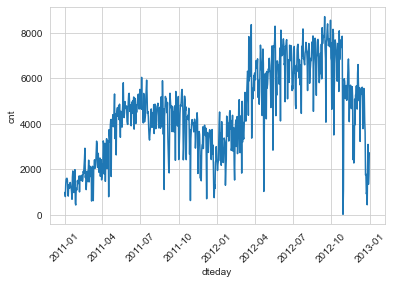

In [15]:
sns.lineplot(x='dteday', y='cnt', data=bike_share_df)
plt.xticks(rotation=45)
plt.show()

Dari grafik garis di atas, kita dapat melihat secara langsung bahwa grafiknya cenderung naik turun. Apa yang menyebabkan demikian? Apakah naik turun ini disebabkan oleh musim? Atau kondisi cuaca? Ayo kita telusuri.

In [16]:
# Sebelum memvisualisasikan berdasarkan musim dan kondisi cuaca,
# kita ubah terlebih dahulu nilai pada kolom 'season' dan 'weathersit'

season_dict = {1:'musim semi',
              2:'musim panas',
              3:'musim gugur',
              4:'musim dingin'}

weather_dict = {1:'cerah',
               2:'kabut',
               3:'gerimis',
               4:'hujan deras'}
    
bike_share_df['season'] = bike_share_df['season'].replace(season_dict)
bike_share_df['weathersit'] = bike_share_df['weathersit'].replace(weather_dict)
bike_share_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,musim semi,0,1,0,6,0,kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,musim semi,0,1,0,0,0,kabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,musim semi,0,1,0,1,1,cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,musim semi,0,1,0,2,1,cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,musim semi,0,1,0,3,1,cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,musim semi,1,12,0,4,1,kabut,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,musim semi,1,12,0,5,1,kabut,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,musim semi,1,12,0,6,0,kabut,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,musim semi,1,12,0,0,0,cerah,0.255833,0.231700,0.483333,0.350754,364,1432,1796


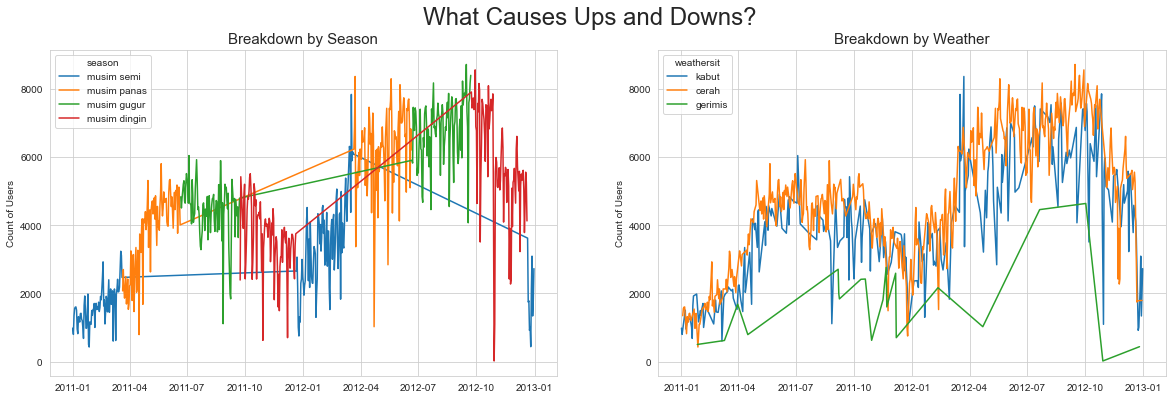

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.lineplot(x='dteday', y='cnt', hue='season', data=bike_share_df, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel("Count of Users")
ax[0].set_title("Breakdown by Season", loc="center", fontsize=15)

sns.lineplot(x='dteday', y='cnt', hue='weathersit', data=bike_share_df, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel("Count of Users")
ax[1].set_title("Breakdown by Weather", loc="center", fontsize=15)

plt.suptitle("What Causes Ups and Downs?", fontsize=24)
plt.show()

    Pada grafik Breakdown by Season, kita bisa mengetahui polanya. Ternyata, setiap musim memiliki perilaku yang berbeda beda.
    - Pada musim semi, trennya cenderung meningkat seiring bertambahnya hari.
    - Pada musim panas, trennya meningkat dan kemudian stabil seiring bertambahnya hari.
    - Pada musim gugur, trennya cenderung stabil seiring bertambahnya hari.
    - Pada musim dingin, trennya cenderung menurun seiring bertambahnya hari.
    
    Pada grafik Breakdown by Weather, kita juga bisa melihat polanya.
    - Penyewaan sepeda pada saat cuaca cerah cenderung lebih banyak daripada cuaca kabut dan gerimis.
    - Penyewaan sepeda pada saat cuaca gerimis cenderung memiliki tren yang rendah

### Pertanyaan 2: 

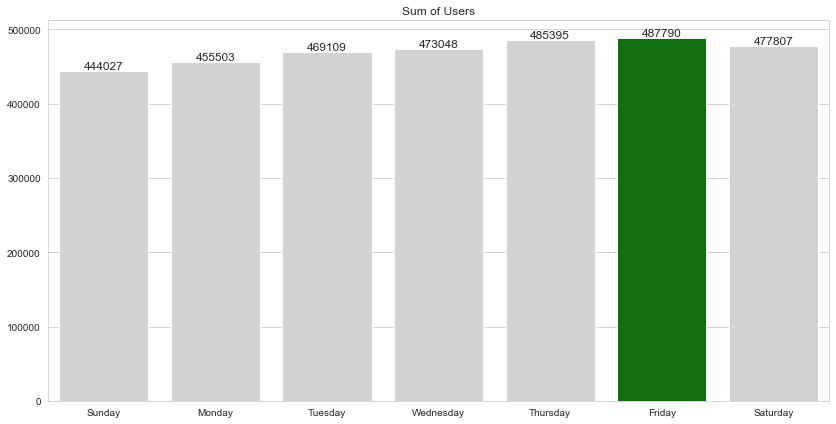

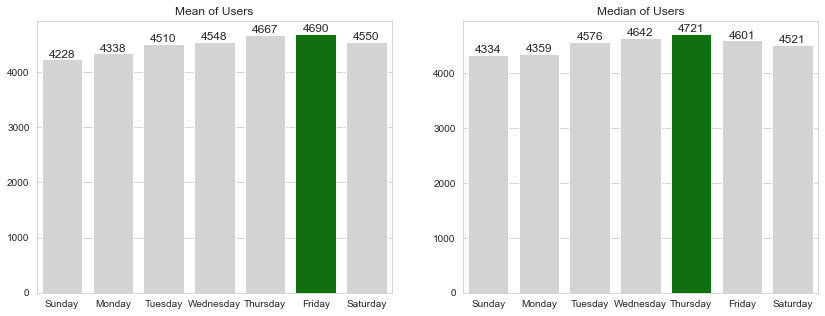

In [18]:
# Sebelum melakukan visualisasi menggunakan hari, kita
# ubah terlebih dahulu nilainya menjadi nama-nama hari

day_dict = {0:'Sunday',
           1:'Monday',
           2:'Tuesday',
           3:'Wednesday',
           4:'Thursday',
           5:'Friday',
           6:'Saturday'}
groupby_weekday['weekday'] = groupby_weekday['weekday'].replace(day_dict)

plt.figure(figsize=(14,7))
sns.barplot(data=groupby_weekday, x='weekday', y=('cnt','sum'), label='Count Sum', palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "green","#D3D3D3"])
plt.xlabel(None)
plt.ylabel(None)
for x, y in zip(range(0,7), groupby_weekday[('cnt','sum')]):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=12)
plt.title("Sum of Users")
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(14,5))

sns.barplot(data=groupby_weekday, x='weekday', y=('cnt','mean'), label='Count Mean', ax=ax[0], palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "green","#D3D3D3"])
ax[0].set_title("Mean of Users")
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
for x, y in zip(range(7), groupby_weekday[('cnt','mean')]):
    ax[0].text(x, y, str(int(y)), ha='center', va='bottom', fontsize=12)

sns.barplot(data=groupby_weekday, x='weekday', y=('cnt','median'), label='Count Median', ax=ax[1], palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",  "green", "#D3D3D3", "#D3D3D3"])
ax[1].set_title("Median of Users")
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
for x, y in zip(range(0,7), groupby_weekday[('cnt','median')]):
    ax[1].text(x, y, str(int(y)), ha='center', va='bottom', fontsize=12)
plt.show()

Berdasarkan grafik batang di atas, ternyata Hari Kamis dan Jum'at cenderung memiliki nilai yang lebih banyak daripada hari-hari lainnya meskipun selisih nilainya tidak begitu jauh antara hari-hari terseut.

Saya menggunakan nilai sum pada perhitungan karena dengan ini bisa menentukan jumlah banyaknya pengguna dari awal sampai akhir yang dikelompokkan berdasarkan hari. Menggunakan nilai mean karena dataset ini tidak memiliki outlier. Menggunakan median untuk mendapatkan nilai tengah dari dataset. Dataset ini memiliki nilai yang baik karena nilai mean dan mediannya tidak berbeda jauh.

### Pertanyaan 3:

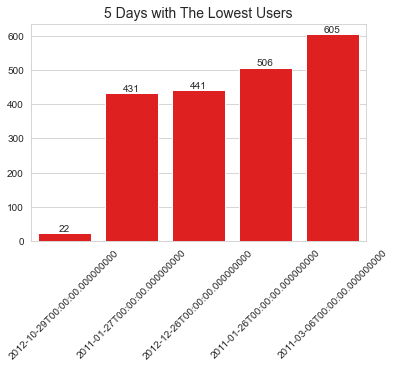

In [19]:
sns.barplot(data=sort_values_by_cnt.head(), x='dteday', y='cnt', palette=['red', 'red','red','red','red'])
for x, y in zip(range(5), sort_values_by_cnt['cnt']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel(None)
plt.title("5 Days with The Lowest Users", fontsize=14)
plt.show()

Tanggal 29 Oktober 2012 memiliki pengguna paling sedikit, yaitu hanya 22 pengguna. Apa yang menyebabkan hal ini terjadi? Ayo kita periksa data pada tanggal ini!

In [20]:
bike_share_df[bike_share_df['cnt']==22]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,musim dingin,1,10,0,1,1,gerimis,0.44,0.4394,0.88,0.3582,2,20,22


Ternyata, pada hari itu bertepatan pada hari kerja, bermusim dingin, dan cuaca pada saat itu sedang gerimis.

Apakah penyebabnya hanya itu saja? Kemungkinan besar jawabannya adalah "Iya". Karena setelah saya mencari informasi pada tanggal tersebut di Google, tidak ada peristiwa yang begitu parah sehingga akan menyebabkan orang-orang tidak bisa beraktivitas.

### Pertanyaan 4:

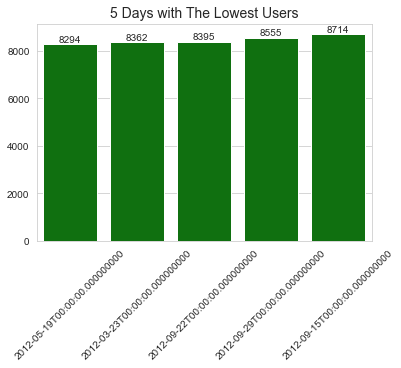

In [21]:
sns.barplot(data=sort_values_by_cnt.tail(), x='dteday', y='cnt', palette=['green', 'green','green','green','green'])
for x, y in zip(range(5), sort_values_by_cnt['cnt'].tail()):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel(None)
plt.title("5 Days with The Lowest Users", fontsize=14)
plt.show()

Tanggal 15 September 2012 memiliki jumlah pengguna terbanyak. Apa yang menyebabkan ini terjadi? Ayo kita telusuri datanya!

In [22]:
bike_share_df[bike_share_df['cnt']==8714]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,musim gugur,1,9,0,6,0,cerah,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


Ternyata, pada tanggal ini bertepatan pada hari libur, bermusim gugur, dan bercuaca cerah. Hmmmm... Situasi dan kondisi yang sangat pas untuk bersepeda, bukan? :D

Tetapi, apakah hanya itu faktor yang menyebabkan tanggal tersebut memiliki jumlah pengguna terbanyak? Kemungkinan terbesar jawabannya "Iya" (lagi). Karena setelah saya mencari informasi di Google, tidak ada event yang berhubungan dengan bersepeda.

### Pertanyaan 5:

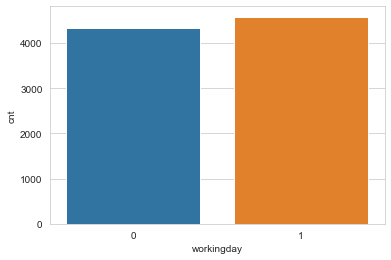

In [23]:
sns.barplot(data=mean_by_workingday, x='workingday', y='cnt')
plt.show()

Korelasi antara hari kerja dengan banyaknya pengguna tidak terlalu berpengaruh. Selisih rata-rata antara hari kerja dengan hari libur tidak terlalu signifikan.

<AxesSubplot:>

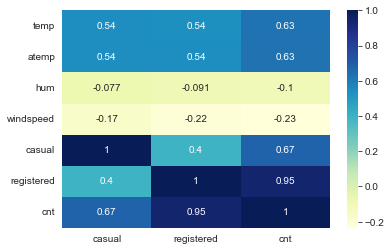

In [24]:
sns.heatmap(corr, annot=True, cmap='YlGnBu')

Dari diagram heatmap di atas, kita dapat mengetahui bahwa temperatur memiliki pengaruh sebesar 63% terhadap banyaknya pengguna. Sedangkan kelembaban dan kecepatan angin tidak begitu berpengaruh terhadap banyaknya pengguna.

## Conclusion

- Tren yang terjadi selama rentang waktu tersebut (1 Januari 2011 s/d 31 Desember 2012) adalah naik turun. Naik turun ini dapat disebabkan oleh perubahan musim dan cuaca.
- Pengguna cenderung lebih banyak bersepeda pada Hari Kamis dan Jum'at.
- Penyewaan sepeda paling rendah terjadi pada tanggal 29 Oktober 2012. Hal ini terjadi karena pada hari tersebut adalah hari kerja, bermusim dingin, dan sedang gerimis.
- Penyewaan sepeda paling tinggi terjadi pada tanggal 15 September 2012. Hal ini terjadi karena pada hari tersebut adalah hari libur, bermusim gugur, dan cuacanya cerah.
- Korelasi antara:
    - Musim dengan banyaknya pengguna adalah sangat berpengaruh. 
    - Hari kerja dengan banyaknya pengguna adalah tidak begitu berpengaruh.
    - Cuaca dengan banyaknya pengguna adalah sangat berpengaruh.
    - Temperatur dengan banyaknya pengguna adalah berpengaruh sebesar 63%.
    - Kelembaban dengan banyaknya pengguna adalah sangat-sangat tidak berpengaruh.
    - Kecepatan angin dengan banyaknya pengguna adalah sangat-sangat tidak berpengaruh.